In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from math import sqrt 

In [141]:
#data
df = pd.read_csv('C:/Users/admin/Desktop/Assignment/train_csv.csv')

In [143]:
df.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [144]:
df.tail()

,id,time,feature
75,75,2019-03-19 00:12:30,469.72
76,76,2019-03-19 00:12:40,406.79
77,77,2019-03-19 00:12:50,128.91
78,78,2019-03-19 00:13:00,85.28
79,79,2019-03-19 00:13:10,121.12


In [145]:
df.shape

(80, 3)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
id         80 non-null int64
time       80 non-null object
feature    80 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


Time column is shown as objetc datatype, therefore converting it to datetime type

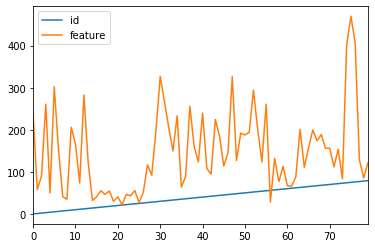

In [147]:
df.plot()

In [148]:
#Converting time object to datetime
df['time'] = pd.to_datetime(train['time'],format='%Y-%m-%d %H:%M:%S')

df['year']=df['time'].dt.year 
df['month']=df['time'].dt.month 
df['day']=df['time'].dt.day

df['dayofweek_num']=df['time'].dt.dayofweek  
df['dayofweek_name']=df['time'].dt.weekday_name

df['Hour'] = df['time'].dt.hour 
df['minute'] = df['time'].dt.minute 
df['second'] = df['time'].dt.second

In [149]:
df.head()

,id,time,feature,year,month,day,dayofweek_num,dayofweek_name,Hour,minute,second
0,0,2019-03-19 00:00:00,237.97,2019,3,19,1,Tuesday,0,0,0
1,1,2019-03-19 00:00:10,57.93,2019,3,19,1,Tuesday,0,0,10
2,2,2019-03-19 00:00:20,90.53,2019,3,19,1,Tuesday,0,0,20
3,3,2019-03-19 00:00:30,260.75,2019,3,19,1,Tuesday,0,0,30
4,4,2019-03-19 00:00:40,49.70,2019,3,19,1,Tuesday,0,0,40


In [150]:
df.tail()

,id,time,feature,year,month,day,dayofweek_num,dayofweek_name,Hour,minute,second
75,75,2019-03-19 00:12:30,469.72,2019,3,19,1,Tuesday,0,12,30
76,76,2019-03-19 00:12:40,406.79,2019,3,19,1,Tuesday,0,12,40
77,77,2019-03-19 00:12:50,128.91,2019,3,19,1,Tuesday,0,12,50
78,78,2019-03-19 00:13:00,85.28,2019,3,19,1,Tuesday,0,13,0
79,79,2019-03-19 00:13:10,121.12,2019,3,19,1,Tuesday,0,13,10


In [152]:
#we have an id column which represents the index, therefore dropping it
del df['id']

In [153]:
df.describe()

,feature,year,month,day,dayofweek_num,Hour,minute,second
count,80.000000,80.0,80.0,80.0,80.0,80.0,80.000000,80.000000
mean,147.496375,2019.0,3.0,19.0,1.0,0.0,6.175000,24.500000
std,96.846260,0.0,0.0,0.0,0.0,0.0,3.877148,17.276603
min,21.360000,2019.0,3.0,19.0,1.0,0.0,0.000000,0.000000
25%,66.730000,2019.0,3.0,19.0,1.0,0.0,3.000000,10.000000
50%,125.240000,2019.0,3.0,19.0,1.0,0.0,6.000000,20.000000
75%,199.820000,2019.0,3.0,19.0,1.0,0.0,9.250000,40.000000
max,469.720000,2019.0,3.0,19.0,1.0,0.0,13.000000,50.000000


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
time              80 non-null datetime64[ns]
feature           80 non-null float64
year              80 non-null int64
month             80 non-null int64
day               80 non-null int64
dayofweek_num     80 non-null int64
dayofweek_name    80 non-null object
Hour              80 non-null int64
minute            80 non-null int64
second            80 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 6.4+ KB


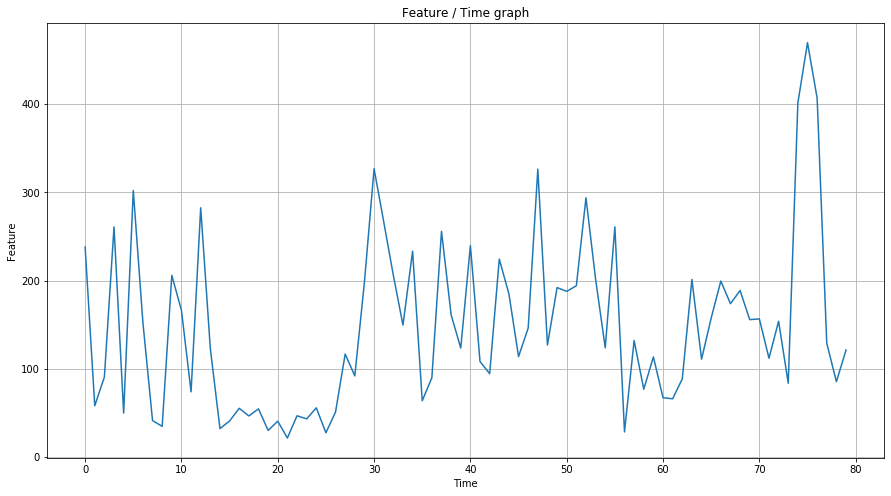

In [155]:
#now viasualising ony the target variable from the dataset
plt.figure(figsize=(15,8))
plt.plot(train.index, df['feature'])
plt.title('Feature / Time graph')
plt.xlabel('Time')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

<Figure size 1152x864 with 0 Axes>

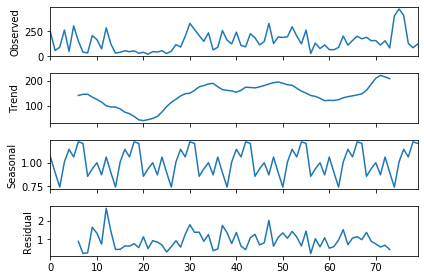

In [156]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(df.feature,freq=12,model="multiplicative")
plt.figure(figsize=(16,12))
res.plot()
plt.show()


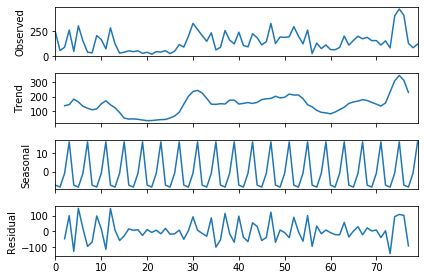

In [157]:
# additive
res = sm.tsa.seasonal_decompose(df.feature,freq=4,model="additive")
res.plot()
plt.show()

In [162]:
#Train and Test Split
train = df[0:56]
test = df[56:]


In [163]:
train

,time,feature,year,month,day,dayofweek_num,dayofweek_name,Hour,minute,second
0,2019-03-19 00:00:00,237.97,2019,3,19,1,Tuesday,0,0,0
1,2019-03-19 00:00:10,57.93,2019,3,19,1,Tuesday,0,0,10
2,2019-03-19 00:00:20,90.53,2019,3,19,1,Tuesday,0,0,20
3,2019-03-19 00:00:30,260.75,2019,3,19,1,Tuesday,0,0,30
4,2019-03-19 00:00:40,49.70,2019,3,19,1,Tuesday,0,0,40
5,2019-03-19 00:00:50,302.08,2019,3,19,1,Tuesday,0,0,50
6,2019-03-19 00:01:00,152.25,2019,3,19,1,Tuesday,0,1,0
7,2019-03-19 00:01:10,41.19,2019,3,19,1,Tuesday,0,1,10
8,2019-03-19 00:01:20,34.61,2019,3,19,1,Tuesday,0,1,20
9,2019-03-19 00:01:30,205.87,2019,3,19,1,Tuesday,0,1,30


In [164]:
test

,time,feature,year,month,day,dayofweek_num,dayofweek_name,Hour,minute,second
56,2019-03-19 00:09:20,28.26,2019,3,19,1,Tuesday,0,9,20
57,2019-03-19 00:09:30,131.97,2019,3,19,1,Tuesday,0,9,30
58,2019-03-19 00:09:40,76.73,2019,3,19,1,Tuesday,0,9,40
59,2019-03-19 00:09:50,113.35,2019,3,19,1,Tuesday,0,9,50
60,2019-03-19 00:10:00,67.01,2019,3,19,1,Tuesday,0,10,0
61,2019-03-19 00:10:10,65.89,2019,3,19,1,Tuesday,0,10,10
62,2019-03-19 00:10:20,88.47,2019,3,19,1,Tuesday,0,10,20
63,2019-03-19 00:10:30,201.17,2019,3,19,1,Tuesday,0,10,30
64,2019-03-19 00:10:40,110.79,2019,3,19,1,Tuesday,0,10,40
65,2019-03-19 00:10:50,157.37,2019,3,19,1,Tuesday,0,10,50


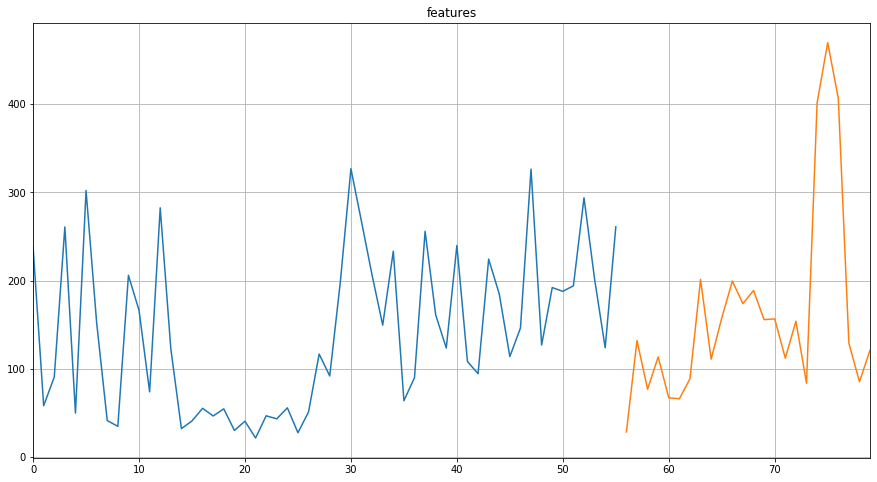

In [170]:
train.feature.plot(figsize=(15,8), title= 'features', fontsize=10) 
test.feature.plot(figsize=(15,8), title= 'features', fontsize=10)
plt.grid()
plt.show()


In [172]:
# Testing whether the data is Stationarity

from statsmodels.tsa.stattools import adfuller

In [174]:
result=adfuller(train['feature'])

In [175]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(feature):
    result=adfuller(feature)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [176]:
adfuller_test(train['feature'])

ADF Test Statistic : -2.019202121522598
p-value : 0.27821761851261906
#Lags Used : 2
Number of Observations Used : 53
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [177]:
adfuller_test(test['feature'])

ADF Test Statistic : -2.85634452912096
p-value : 0.050665148650257646
#Lags Used : 2
Number of Observations Used : 21
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


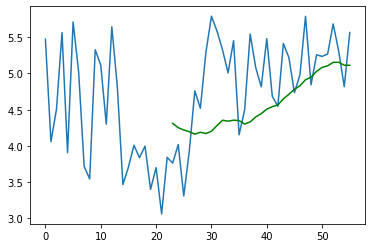

In [192]:
# Removing the trend in he data
train_log = np.log(train['feature']) 
test_log = np.log(test['feature'])
moving_avg = train_log.rolling(24).mean()
plt.plot(train_log) 
plt.plot(moving_avg, color = 'green') 
plt.show()

In [193]:
train_log_moving_avg_diff = train_log - moving_avg

In [203]:
adfuller_test(train_log_moving_avg_diff.dropna())

ADF Test Statistic : -2.8002266691310655
p-value : 0.05824139729087721
#Lags Used : 2
Number of Observations Used : 30
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [204]:
#lag to bring stable data
train_log_diff = train_log - train_log.shift(1) 


In [205]:
adfuller_test(train_log_diff.dropna())

ADF Test Statistic : -10.293308611998642
p-value : 3.523687006150717e-18
#Lags Used : 1
Number of Observations Used : 53
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

from above it is clear that the data is now stationary as p value is less than o 0.05

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

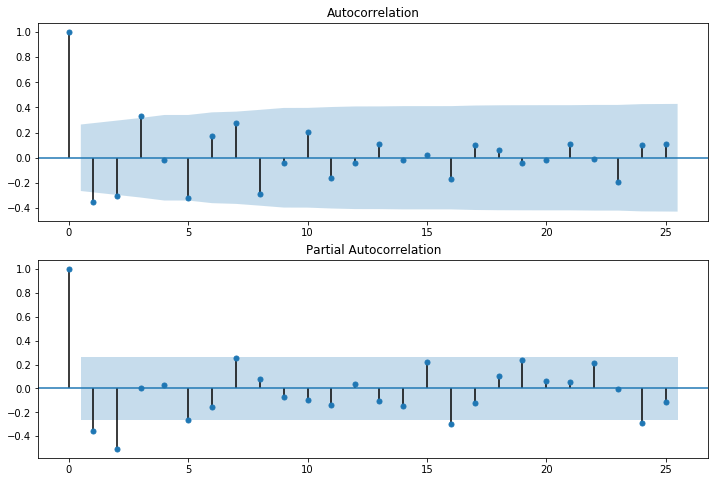

In [208]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_log_diff.dropna(),lags=25,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_log_diff.dropna(),lags=25,ax=ax2)

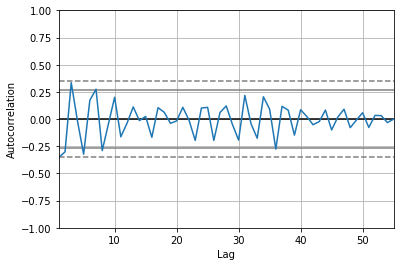

In [209]:
#ARIMA Model
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train_log_diff.dropna())
plt.show()

In [35]:
from statsmodels.tsa.arima_model import ARIMA

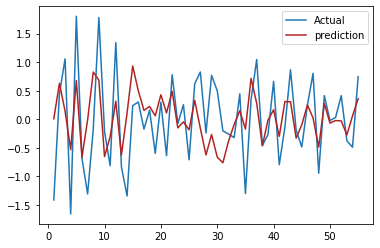

In [213]:
model = ARIMA(train_log, order=(1, 1, 1))
result_AR = model.fit(disp=0)  
plt.plot(train_log_diff.dropna(), label='Actual') 
plt.plot(result_AR.fittedvalues, color='firebrick', label='prediction') 
plt.legend(loc='best') 
plt.show()

In [215]:
result_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.feature   No. Observations:                   55
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -54.637
Method:                       css-mle   S.D. of innovations              0.650
Date:                Fri, 12 Jun 2020   AIC                            117.273
Time:                        17:47:13   BIC                            125.302
Sample:                             1   HQIC                           120.378
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0090      0.030      0.296      0.769      -0.050       0.068
ar.L1.D.feature     0.0504      0.211      0.239      0.812      -0.362       0.463
ma.L1.D.feature    -0.6845      0.156     -4.393      0.000      -0.990      -0.379
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           19.8430           +0.0000j           19.8430            0.0000
MA.1            1.4610           +0.0000j            1.4610            0.0000
-----------------------------------------------------------------------------
"""

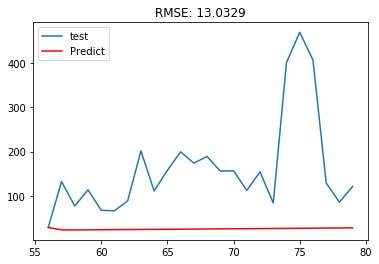

In [218]:
AR_predict=result_AR.predict(start=56, end=79) 
AR_predict=AR_predict.cumsum().shift().fillna(0) 
AR_predict1=pd.Series(np.ones(test.shape[0]) * np.log(test['feature'])[56], index = test.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)
plt.plot(test['feature'], label = "test") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, test['feature']))/test.shape[0])) 
plt.show()

In [ ]:
#Modelling using Seasonal ARIMA i.e SARIMAX

In [57]:
import statsmodels.api as sm

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


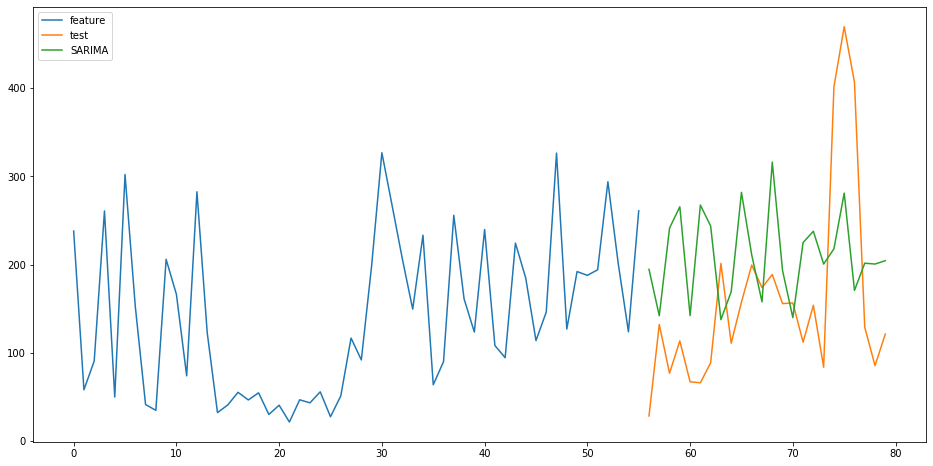

In [248]:
y_hat = test.copy() 
model_fit = sm.tsa.statespace.SARIMAX(train.feature, order=(2,1,4),seasonal_order=(1,1,1,7)).fit() 
y_hat['SARIMA'] = model_fit.predict(start=50, end=79, dynamic=True) 
plt.figure(figsize=(16,8)) 
plt.plot( train['feature'], label='feature') 
plt.plot(test['feature'], label='test') 
plt.plot(y_hat['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

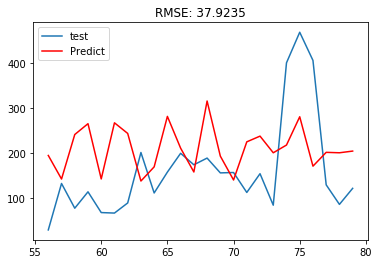

In [251]:
plt.plot(test['feature'], label = "test") 
plt.plot(y_hat.SARIMA, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(y_hat.SARIMA, test['feature']))/test.shape[0])) 
plt.show()

Here, we can see that Seasonal ARIMA or SARIMA is giving a better prediction compared to ARIMA as the dataset contains seasonal data

In [261]:
test_pred = pd.read_csv('C:/Users/admin/Desktop/Assignment/test_csv.csv')
test_pred["feature"]= y_hat['SARIMA']

In [263]:
test_pred.to_csv("C:/Users/admin/Desktop/Assignment/submission.csv", index=None)